# Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

# Importing Libraries 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test  = pd.read_csv('test_mSzZ8RL.csv')

# EDA

In [3]:
train.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [4]:
test.tail()

ID Gender  Age Region_Code Occupation Channel_Code  Vintage  \
105307  DBENJOYI   Male   52       RG268   Salaried           X2       86   
105308  CWQ72DWS   Male   55       RG277      Other           X2       86   
105309  HDESC8GU   Male   35       RG254   Salaried           X4       15   
105310  2PW4SFCA   Male   53       RG254      Other           X3       93   
105311  F2NOYPPZ   Male   27       RG256   Salaried           X1       21   

       Credit_Product  Avg_Account_Balance Is_Active  
105307            Yes              4242558       Yes  
105308            Yes              1159153        No  
105309             No              1703727        No  
105310             No               737178       Yes  
105311             No               591565        No

0    187437
1     58288
Name: Is_Lead, dtype: int64


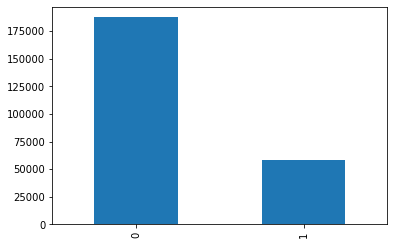

In [5]:
print(train.Is_Lead.value_counts())
train.Is_Lead.value_counts().plot(kind='bar');

# From the bar chart we are seeing only 23.72 % of total population are interested and rest are not interested for the Credit Card.



# Data Cleaning

In [6]:
train_test_data = [train,test]
#missing values
for dataset in train_test_data:
    print(dataset.isnull().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


# "Credit_Product" missing value treatment

In [7]:
for dataset in train_test_data:
    dataset['Credit_Product'].fillna(dataset['Credit_Product'].mode()[0],inplace=True)

# Avg_Account_Balance

In [8]:
#Let's find out the min and max value
print(f"train max value of avg_account_balance :{train['Avg_Account_Balance'].max()}")
print(f"train min value of avg_account_balance :{train['Avg_Account_Balance'].min()}")
print("\n")
print(f"test max value of avg_account_balance :{test['Avg_Account_Balance'].max()}")
print(f"test min value of avg_account_balance :{test['Avg_Account_Balance'].min()}")

train max value of avg_account_balance :10352009
train min value of avg_account_balance :20790


test max value of avg_account_balance :9908858
test min value of avg_account_balance :22597


In [9]:
#Avg_Account_Balance <= 1000000  == lower income grp
#Avg_Account_Balance > 1000000  and <= 2000000 == higher income grp
#Avg_Account_Balance > 1000000  and <= 2000000 == more higher income grp
#Avg_Account_Balance > 3000000  == rich income grp
train.loc[train['Avg_Account_Balance'] <= 1000000,'Avg_Account_Balance']                                               = 0
train.loc[(train['Avg_Account_Balance'] > 1000000) & (train['Avg_Account_Balance'] <= 2000000),'Avg_Account_Balance']  = 1
train.loc[(train['Avg_Account_Balance'] > 2000000) & (train['Avg_Account_Balance'] <= 3000000),'Avg_Account_Balance']  = 2
train.loc[train['Avg_Account_Balance'] > 3000000,'Avg_Account_Balance']                                                = 3

In [10]:
test.loc[test['Avg_Account_Balance'] <= 1000000,'Avg_Account_Balance']                                               = 0
test.loc[(test['Avg_Account_Balance'] > 1000000) & (test['Avg_Account_Balance'] <= 2000000),'Avg_Account_Balance']   = 1
test.loc[(test['Avg_Account_Balance'] > 2000000) & (test['Avg_Account_Balance'] <= 3000000),'Avg_Account_Balance']   = 2
test.loc[test['Avg_Account_Balance'] > 3000000,'Avg_Account_Balance']                                                = 3

In [11]:
train['Avg_Account_Balance'].value_counts()

0    140616
1     79053
2     17169
3      8887
Name: Avg_Account_Balance, dtype: int64

In [12]:
test['Avg_Account_Balance'].value_counts()

0    60102
1    33894
2     7308
3     4008
Name: Avg_Account_Balance, dtype: int64

# Gender

In [13]:
gender_map = {'Male':0,'Female':1}
for dataset in train_test_data:
    dataset.Gender = dataset.Gender.map(gender_map)

# Age

In [14]:
#Let's find out the min and max value of Age
print(f"train max value of Age :{train['Age'].max()}")
print(f"train min value of Age :{train['Age'].min()}")
print("\n")
print(f"test max value of Age :{test['Age'].max()}")
print(f"test min value of Age :{test['Age'].min()}")

train max value of Age :85
train min value of Age :23


test max value of Age :85
test min value of Age :24


# Age Binning

In [15]:
#Age <= 30  == young
#Age > 30  and <= 40 == mid age
#Age > 40  and <= 60 == higher mid age
#Age > 60  == old age grp
train.loc[train['Age'] <= 30,'Age']                          = 0
train.loc[(train['Age'] > 30) & (train['Age'] <= 40),'Age']  = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 60),'Age']  = 2
train.loc[train['Age'] > 60,'Age']                           = 3

In [16]:
test.loc[test['Age'] <= 30,'Age']                          = 0
test.loc[(test['Age'] > 30) & (test['Age'] <= 40),'Age']   = 1
test.loc[(test['Age'] > 40) & (test['Age'] <= 60),'Age']   = 2
test.loc[test['Age'] > 60,'Age']                           = 3

In [17]:
train.Age.value_counts()

2    98258
0    68140
1    44729
3    34598
Name: Age, dtype: int64

In [18]:
test.Age.value_counts()

2    42111
0    29236
1    19049
3    14916
Name: Age, dtype: int64

# Vintage

In [19]:
#Let's find out the min and max value of Vintage
print(f"train max value of Vintage :{train['Vintage'].max()}")
print(f"train min value of Vintage :{train['Vintage'].min()}")
print("\n")
print(f"test max value of Vintage :{test['Vintage'].max()}")
print(f"test min value of Vintage :{test['Vintage'].min()}")

train max value of Vintage :135
train min value of Vintage :7


test max value of Vintage :135
test min value of Vintage :7


# Vintage Binning

In [20]:
#Vintage <= 25  == low
#Vintage > 25  and <= 50 == medium
#Vintage > 50  and <= 100 == high
#Vintage > 100  == higher
train.loc[train['Vintage'] <= 25,'Vintage']                               = 0
train.loc[(train['Vintage'] > 25) & (train['Vintage'] <= 50),'Vintage']   = 1
train.loc[(train['Vintage'] > 50) & (train['Vintage'] <= 100),'Vintage']  = 2
train.loc[train['Vintage'] > 100,'Vintage']                               = 3

In [21]:
test.loc[test['Vintage'] <= 25,'Vintage']                               = 0
test.loc[(test['Vintage'] > 25) & (test['Vintage'] <= 50),'Vintage']    = 1
test.loc[(test['Vintage'] > 50) & (test['Vintage'] <= 100),'Vintage']   = 2
test.loc[test['Vintage'] > 100,'Vintage']                               = 3

In [22]:
train.Vintage.value_counts()

0    86104
2    72324
1    67589
3    19708
Name: Vintage, dtype: int64

# Occupation

In [23]:
for dataset in train_test_data:
    print(dataset['Occupation'].value_counts())

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
Self_Employed    43192
Salaried         30913
Other            30131
Entrepreneur      1076
Name: Occupation, dtype: int64


In [24]:
#Occupation Map
occupation_map = {'Self_Employed':0,'Salaried':1,'Entrepreneur':2,'Other':3}
for dataset in train_test_data:
    dataset.Occupation = dataset.Occupation.map(occupation_map)

# Channel_Code

In [25]:
for dataset in train_test_data:
    print(dataset['Channel_Code'].value_counts())

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
X1    44484
X3    29269
X2    29176
X4     2383
Name: Channel_Code, dtype: int64


In [26]:
#Channel_Code Map
Channel_Code_map = {'X1':0,'X2':1,'X3':2,'X4':3}
for dataset in train_test_data:
    dataset.Channel_Code = dataset.Channel_Code.map(Channel_Code_map)

# Credit_Product

In [27]:
for dataset in train_test_data:
    print(dataset['Credit_Product'].value_counts())

No     173682
Yes     72043
Name: Credit_Product, dtype: int64
No     74130
Yes    31182
Name: Credit_Product, dtype: int64


In [28]:
#Credit_Product Map
Credit_Product_map = {'No':0,'Yes':1}
for dataset in train_test_data:
    dataset.Credit_Product = dataset.Credit_Product.map(Credit_Product_map)

# Is_Active

In [29]:
for dataset in train_test_data:
    print(dataset['Is_Active'].value_counts())

No     150290
Yes     95435
Name: Is_Active, dtype: int64
No     63797
Yes    41515
Name: Is_Active, dtype: int64


In [30]:
#Is_Active Map
Is_Active_map = {'No':0,'Yes':1}
for dataset in train_test_data:
    dataset.Is_Active = dataset.Is_Active.map(Is_Active_map)

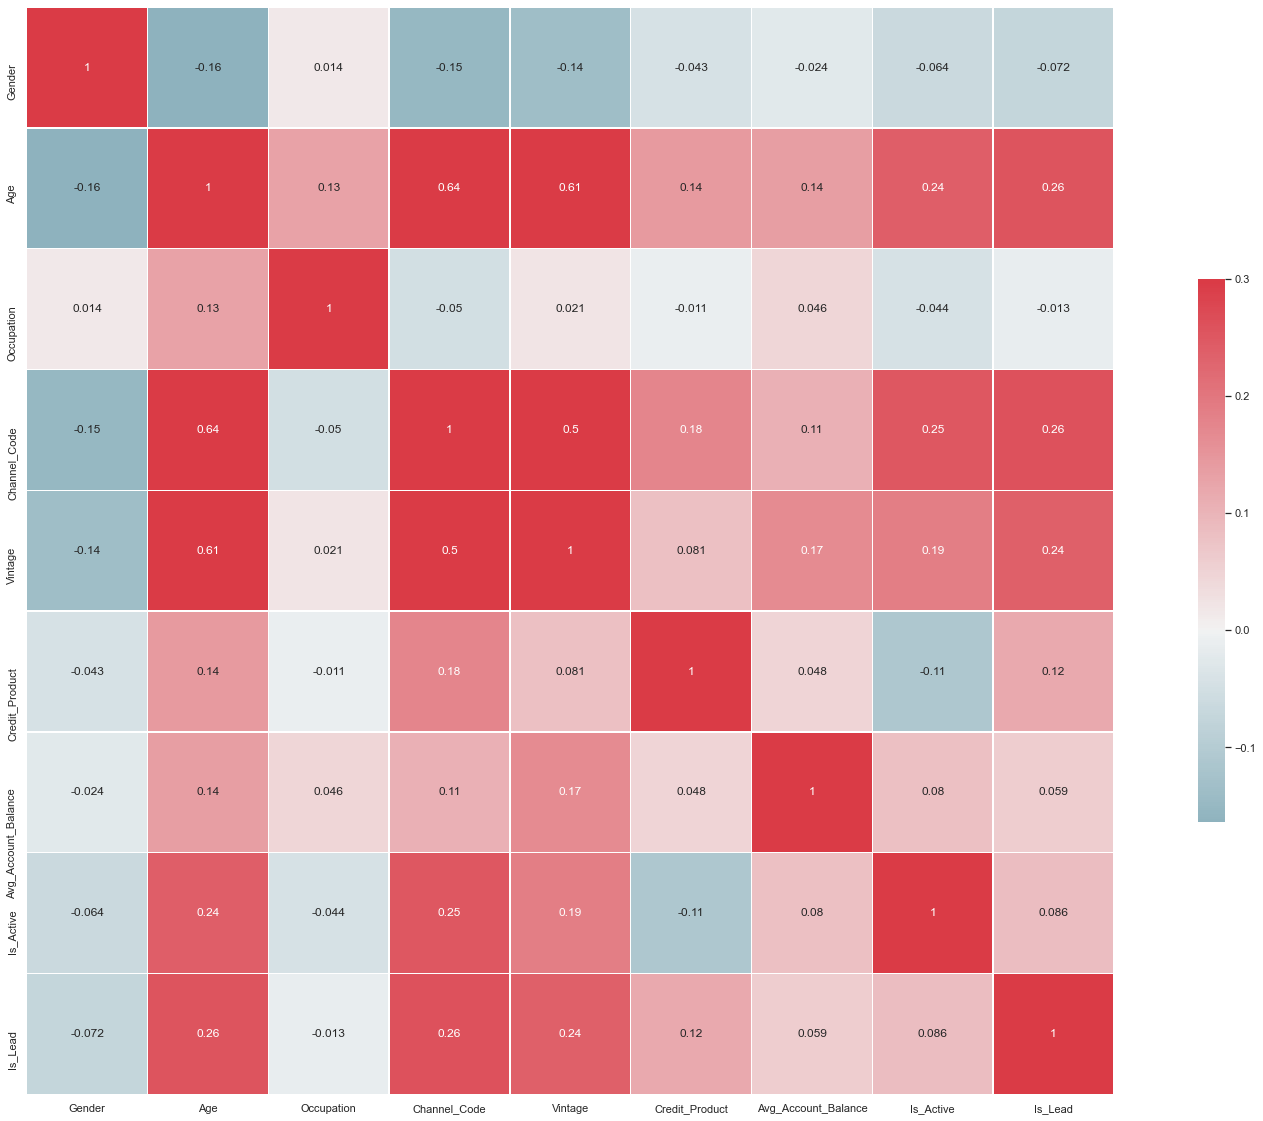

In [31]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# As we see "Vintage" , "Channel_code" are more related with "Age" , we can drop one of them, so let's drop channel_code

# Region_Code doesn't influence model output so can be deleted

In [32]:
for dataset in train_test_data:
    print(dataset['Region_Code'].value_counts())

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64
RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253   

In [33]:
for dataset in train_test_data:
    dataset.drop(['Region_Code','Channel_Code'],axis=1,inplace=True)

In [34]:
train_data = train.drop(['ID','Is_Lead'],axis=1)

In [35]:
X = train_data.values

In [36]:
target = train['Is_Lead']

In [37]:
y = target.values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [39]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (164635, 7)
Shape of X_test : (81090, 7)
Shape of y_train : (164635,)
Shape of y_test : (81090,)


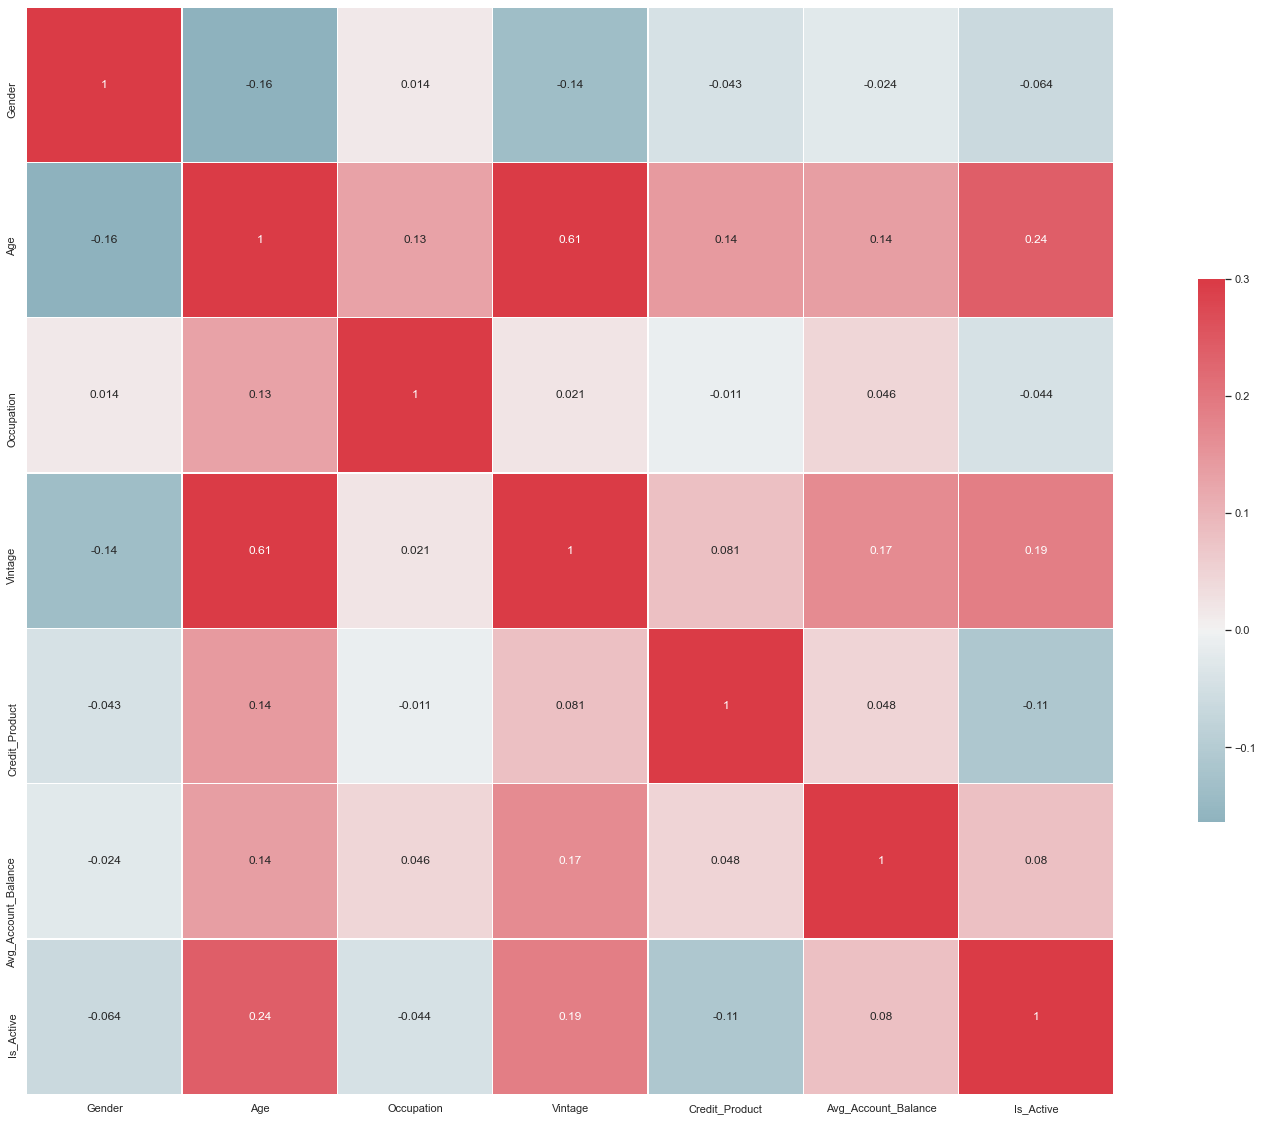

In [40]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train_data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Modelling with Ensemble Techniques

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
#Decission Tree
dt = DecisionTreeClassifier()
clf_dt = dt.fit(X_train,y_train)
y_pred_dt=clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(accuracy_score(y_test,y_pred_dt))

0.7868787766678998


In [43]:
# Using a Random Forest classifier 
model_rf = RandomForestClassifier(n_estimators=100,random_state=0)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Training Accuracy: ", model_rf.score(X_train, y_train))
print('Testing Accuarcy: ', model_rf.score(X_test, y_test))

Training Accuracy:  0.7887326510158836
Testing Accuarcy:  0.7865704772475027


In [44]:
cl_report = classification_report(y_test,y_pred_rf)
print(cl_report)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     61867
           1       0.74      0.15      0.26     19223

    accuracy                           0.79     81090
   macro avg       0.76      0.57      0.57     81090
weighted avg       0.78      0.79      0.73     81090



In [45]:
#A balanced random forest randomly under-samples each boostrap sample to balance it.
model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_balanced_clf = accuracy_score(y_test,y_pred)
print("Training Accuracy: ", model.score(X_train, y_train))
print('Testing Accuarcy: ', model.score(X_test, y_test))

Training Accuracy:  0.6598961338718985
Testing Accuarcy:  0.6550252805524726


In [46]:
cl_report = classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.89      0.63      0.74     61867
           1       0.38      0.74      0.51     19223

    accuracy                           0.66     81090
   macro avg       0.64      0.69      0.62     81090
weighted avg       0.77      0.66      0.68     81090



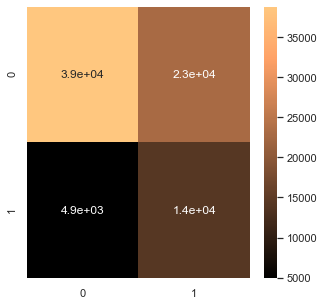

In [47]:
#Confusion Matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

In [48]:
#Logistic Regression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
y_pred_logit = model_logit.predict(X_test)
accuracy_logit = accuracy_score(y_test,y_pred_logit)
print("Training Accuracy: ", model_logit.score(X_train, y_train))
print('Testing Accuarcy: ', model_logit.score(X_test, y_test))

Training Accuracy:  0.7608588696206761
Testing Accuarcy:  0.7612159329140461


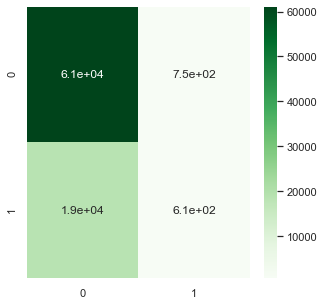

In [49]:
#Confusion Matrix Logistic Regression
plt.rcParams['figure.figsize'] = (5, 5)
cm_logit = confusion_matrix(y_test, y_pred_logit)
sns.heatmap(cm_logit, annot = True, cmap = 'Greens')
plt.show()

In [50]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
clf_knn = knn.fit(X_train,y_train)
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(accuracy_score(y_test,y_pred_knn))

0.7434455543223579


In [51]:
#Support vector machine
# sv = SVC()
# clf_sv = sv.fit(X_train,y_train)
# y_pred = clf_sv.predict(X_test)
# print(accuracy_score(y_test,y_pred))

In [52]:
#Lets use k-fold cross validation
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [53]:
#Decission Tree
score= cross_val_score(dt,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)
print(round(np.mean(score),2))

[0.78620019 0.78680758 0.78334548 0.78437804 0.78650389 0.78412197
 0.78770576 0.78406123 0.78794873 0.78460791]
0.79


In [54]:
#Random Forest
score= cross_val_score(model_rf,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score),2))

0.79


In [55]:
#Support Vector
# score= cross_val_score(sv,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(round(np.mean(score),2))

**Applying Sampling Technique**

**Up sampling with SMOTE**

In [56]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_resample(X, y.ravel())

print(x_resample.shape)
print(y_resample.shape)

(374874, 7)
(374874,)


In [57]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(299899, 7)
(299899,)
(74975, 7)
(74975,)


In [58]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  0.6921963727788355
Testing Accuarcy:  0.685188396132044


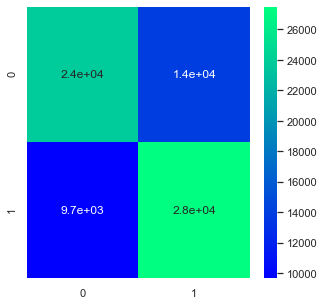

              precision    recall  f1-score   support

           0       0.71      0.63      0.67     37810
           1       0.66      0.74      0.70     37165

    accuracy                           0.69     74975
   macro avg       0.69      0.69      0.68     74975
weighted avg       0.69      0.69      0.68     74975



In [59]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()
# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

# XGBoost Classifier

In [60]:
xgb = XGBClassifier(n_estimators=100)

In [61]:
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
print("Training Accuracy: ", xgb.score(X_train, y_train))
print('Testing Accuarcy: ', xgb.score(X_test, y_test))
print(accuracy_xgb)

Training Accuracy:  0.7866856986667476
Testing Accuarcy:  0.7862621778271057
0.7862621778271057


In [64]:
#Xg Boost
score= cross_val_score(xgb,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score),2))

0.79


In [62]:
# def hyperParameterTuning(X_train, y_train):
#     param_tuning = {
#         'learning_rate': [0.01, 0.1],
#         'max_depth': [3, 5, 7, 10],
#         'min_child_weight': [1, 3, 5],
#         'subsample': [0.5, 0.7],
#         'colsample_bytree': [0.5, 0.7],
#         'n_estimators' : [100, 200, 500],
#         'objective': ['reg:squarederror']
#     }

#     xgb_model = XGBClassifier()

#     gsearch = GridSearchCV(estimator = xgb_model,
#                            param_grid = param_tuning,                        
#                            #scoring = 'neg_mean_absolute_error', #MAE
#                            #scoring = 'neg_mean_squared_error',  #MSE
#                            cv = 5,
#                            n_jobs = -1,
#                            verbose = 1)

#     gsearch.fit(X_train,y_train)

#     return gsearch.best_params_

In [63]:
# results = pd.DataFrame({
#     'Model': ['Decission Tree', 'Random Forest','Logistic','XGBoost','KNN' 'Balanced RandomForest'],
#     'Score': [accuracy_dt, accuracy_rf, accuracy_logit, accuracy_xgb, accuracy_knn, accuracy_balanced_clf]})
# result_df = results.sort_values(by='Score', ascending=False)
# result_df = result_df.set_index('Model')
# result_df

# Final Model  "Random Forest" and "XGboost" gives better result

In [65]:
ids = test['ID']
predictions = model_rf.predict(test.drop('ID', axis=1))

In [68]:
output = pd.DataFrame({ 'ID' : ids, 'Is_Lead': predictions })
output.to_csv('predictions_rudra.csv', index = False)
output.head()

ID  Is_Lead
0  VBENBARO        0
1  CCMEWNKY        0
2  VK3KGA9M        0
3  TT8RPZVC        0
4  SHQZEYTZ        0